* http://scikit-learn.org/stable/modules/naive_bayes.html
* http://dataaspirant.com/2017/02/20/gaussian-naive-bayes-classifier-implementation-python/
* https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/


In [2]:
# Required Python Machine learning Packages
import pandas as pd
import numpy as np

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("adult.data")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

In [8]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [10]:
df = df.dropna()
df.shape

(32560, 15)

In [12]:
df.groupby("income").agg({'income':'count'})

,income
income,
<=50K,24719
>50K,7841


In [14]:
df["income"].value_counts()

income
<=50K    24719
>50K      7841
Name: count, dtype: int64

<Axes: >

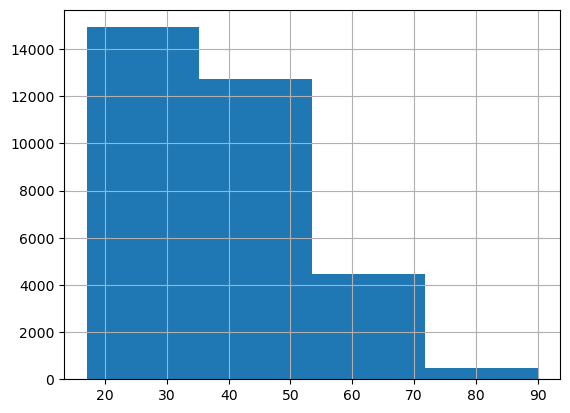

In [16]:
df["age"].hist(bins=4)

In [18]:
df["age_buckets"] = pd.cut(df.age, [0,20,40,60,90], labels=["age_0_20", "age_20_40", "age_40_60", "age_60_90"], include_lowest=True)
#df["age_buckets"] = pd.cut(df.age, [0,20,40,60,90], include_lowest=True)


In [20]:
df[['age','age_buckets']]

,age,age_buckets
0,50,age_40_60
1,38,age_20_40
2,53,age_40_60
3,28,age_20_40
4,37,age_20_40
...,...,...
32555,27,age_20_40
32556,40,age_20_40
32557,58,age_40_60
32558,22,age_20_40


In [22]:
df[['age_buckets','workclass','education','marital_status','race','sex']].head()

,age_buckets,workclass,education,marital_status,race,sex
0,age_40_60,Self-emp-not-inc,Bachelors,Married-civ-spouse,White,Male
1,age_20_40,Private,HS-grad,Divorced,White,Male
2,age_40_60,Private,11th,Married-civ-spouse,Black,Male
3,age_20_40,Private,Bachelors,Married-civ-spouse,Black,Female
4,age_20_40,Private,Masters,Married-civ-spouse,White,Female


In [26]:
# Step 1: Instantiate Label Encoder
le = LabelEncoder()

In [28]:
# Step 2: Grab a list of unique values from a data column
col_values_unique = list(df['education'].unique())
print(col_values_unique)

[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th']


In [30]:
# Step 3: Encode the values --> mapping labels to numerical values
le_fitted = le.fit(col_values_unique)

# Sample dictionary: IGNORE


'''
mapped_values = {
    "Bachelors" : 9,
    "HS-grad" : 11, 
    "11th" : 1
}
'''

'\nmapped_values = {\n    "Bachelors" : 9,\n    "HS-grad" : 11, \n    "11th" : 1\n}\n'

In [34]:
# Step 4: Take all values from a column
col_values = list(df['education'].values)
print(col_values)

[' Bachelors', ' HS-grad', ' 11th', ' Bachelors', ' Masters', ' 9th', ' HS-grad', ' Masters', ' Bachelors', ' Some-college', ' Bachelors', ' Bachelors', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' HS-grad', ' HS-grad', ' 11th', ' Masters', ' Doctorate', ' HS-grad', ' 9th', ' 11th', ' HS-grad', ' Bachelors', ' HS-grad', ' Some-college', ' HS-grad', ' HS-grad', ' Assoc-acdm', ' Some-college', ' Bachelors', ' Some-college', ' Some-college', ' 11th', ' Some-college', ' HS-grad', ' Some-college', ' Assoc-acdm', ' 9th', ' Bachelors', ' Bachelors', ' HS-grad', ' HS-grad', ' Bachelors', ' HS-grad', ' Masters', ' Assoc-voc', ' Assoc-voc', ' Some-college', ' HS-grad', ' Prof-school', ' Bachelors', ' HS-grad', ' Some-college', ' 5th-6th', ' Assoc-voc', ' HS-grad', ' HS-grad', ' Bachelors', ' 7th-8th', ' HS-grad', ' Doctorate', ' Some-college', ' HS-grad', ' Some-college', ' HS-grad', ' Some-college', ' Some-college', ' Some-college', ' Bachelors', ' Bachelors', ' Some-college', ' Some-college', ' 

In [40]:
# Step 5: Map column values to encoded dictionary
#col_values_transformed = le.transform(col_values)
df['education_label_enc'] = le.transform(col_values)
#print(col_values_transformed[:10])
df[['education', 'education_label_enc']].head()

,education,education_label_enc
0,Bachelors,9
1,HS-grad,11
2,11th,1
3,Bachelors,9
4,Masters,12


In [42]:
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        new_col_name = col + '_le'
        df[new_col_name] = col_values_transformed
        

In [44]:
features = df[['age_buckets','workclass','education','marital_status','race','sex']]

label_encode(features, features.columns.values)

target = df[['income']]
label_encode(target, target.columns.values)



/var/folders/6d/xqywj2xx2llc_k2t6nkshrgh0000gn/T/ipykernel_78943/2078505017.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col_name] = col_values_transformed
/var/folders/6d/xqywj2xx2llc_k2t6nkshrgh0000gn/T/ipykernel_78943/2078505017.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col_name] = col_values_transformed
/var/folders/6d/xqywj2xx2llc_k2t6nkshrgh0000gn/T/ipykernel_78943/2078505017.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [52]:
features = features[['age_buckets_le','workclass_le','education_le','marital_status_le','race_le','sex_le']]

target = target[['income_le']]


In [54]:



features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 10)


In [56]:
nb = GaussianNB()
nb.fit(features_train, target_train)
target_pred = nb.predict(features_test)
target_pred

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 0, ..., 1, 1, 0])

In [58]:
comp = pd.concat([target_train.reset_index(), pd.Series(target_pred)], axis=1)
comp.head()

,index,income_le,0
0,12176,0,1.0
1,190,0,1.0
2,22645,0,0.0
3,4802,0,0.0
4,16052,1,1.0


In [60]:
from sklearn import metrics
print(metrics.accuracy_score(target_test, target_pred))

0.7604422604422605


In [62]:
print(metrics.roc_auc_score(target_test, target_pred))

0.7257335342030788
